In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
from datetime import datetime
from numpy import percentile
%matplotlib inline

In [29]:
bank_df = pd.read_csv("./bank.csv")
bank_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no
5,46.0,self-employed,divorced,tertiary,no,926,yes,no,cellular,1,apr,463,1,133,3,failure,no
6,34.0,blue-collar,married,secondary,no,1924,yes,yes,cellular,1,apr,161,2,253,1,failure,no
7,45.0,services,divorced,secondary,no,396,yes,yes,cellular,1,apr,251,4,329,4,failure,no
8,58.0,management,divorced,tertiary,no,315,yes,no,cellular,1,apr,121,2,135,2,failure,no
9,49.0,management,divorced,tertiary,no,20727,no,no,cellular,1,apr,285,3,132,2,failure,no


### Check for missing values

In [30]:
# Display Missing Values
bank_df.isnull().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

In [31]:
# Display Percentage of missing values
bank_df.isnull().sum() / 2000 * 100

age            0.60
job            0.50
marital        0.00
education      5.20
default        0.00
balance        0.00
housing        0.00
loan           0.00
contact        9.55
day            0.00
month          0.00
duration       0.00
campaign       0.00
pdays          0.00
previous       0.00
poutcome      22.70
subscribed     0.00
dtype: float64

### Copy DataFrame to work with

In [32]:
bank_df_copy = bank_df

#### Drop poutcome column

22.7% of the poutcome column is missing. So I dropped this column.

In [33]:
bank_df_copy = bank_df_copy.drop('poutcome', axis=1)


### Fill contact method

10% of the contact method column is null. Of the data that is present 83.15% was contacted by cellular and 7.30% was contacted by telephone. I am going to make an assumption that the majority of the 
remaining 9.55% was contacted by cellular and fill the null values this way.

In [34]:
bank_df_copy['contact'].value_counts() / 2000 * 100

cellular     83.15
telephone     7.30
Name: contact, dtype: float64

In [35]:
print(f"Null: { bank_df_copy['contact'].isnull().sum() / 2000 * 100}%")

Null: 9.55%


In [36]:
bank_df_copy['contact'] = bank_df_copy['contact'].fillna('cellular')

In [37]:
bank_df_copy['contact'].value_counts() / 2000 * 100

cellular     92.7
telephone     7.3
Name: contact, dtype: float64

### Fill Null values in age column

As only 0.6% of the age column is Null I will fill missing values with the mean age.

In [38]:
mean_age = bank_df_copy['age'].mean()
bank_df_copy['age'] = bank_df_copy['age'].fillna(mean_age)

In [39]:
# Display Percentage of missing values
bank_df_copy.isnull().sum() 

age             0
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
subscribed      0
dtype: int64

### Encode Ordinal Categorical Attributes

I identified two columns as ordinal categorical attributes. The first is education which has the values nan, primary, secondary and tertiary, and I ordered them 0 for nan, 1 for primary, 2 for secondary and 3 for tertiary.

The second ordinal categorical attribute I identified was the months of the year which I gave values of 1 to 12.


In [40]:
#bank_df_copy['education'].unique()

education_mapper = {
    np.nan : 0,
    "primary": 1,
    "secondary": 2,
    "tertiary": 3
}

bank_df_copy["education"] = bank_df_copy["education"].replace(education_mapper)

In [41]:
# Create a list of unique month values from the 'month' column of the bank_df_copy DataFrame
months = list(bank_df_copy['month'].unique())

# Create a dictionary called month_mapper that maps each unique month string to its corresponding month number
month_mapper = {month: datetime.strptime(month, '%b').month for month in months}

# Replace each value in the 'month' column of the bank_df_copy DataFrame
#  with its corresponding month number using the month_mapper dictionary
bank_df_copy['month'] = bank_df_copy['month'].replace(month_mapper)


In [42]:
bank_df_copy.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,subscribed
0,32.0,technician,single,3,no,392,yes,no,cellular,1,4,957,2,131,2,no
1,39.0,technician,divorced,2,no,688,yes,yes,cellular,1,4,233,2,133,1,no
2,59.0,retired,married,2,no,1035,yes,yes,cellular,1,4,126,2,239,1,no
3,47.0,blue-collar,married,2,no,398,yes,yes,cellular,1,4,274,1,238,2,no
4,54.0,retired,married,2,no,1004,yes,no,cellular,1,4,479,1,307,1,no
5,46.0,self-employed,divorced,3,no,926,yes,no,cellular,1,4,463,1,133,3,no
6,34.0,blue-collar,married,2,no,1924,yes,yes,cellular,1,4,161,2,253,1,no
7,45.0,services,divorced,2,no,396,yes,yes,cellular,1,4,251,4,329,4,no
8,58.0,management,divorced,3,no,315,yes,no,cellular,1,4,121,2,135,2,no
9,49.0,management,divorced,3,no,20727,no,no,cellular,1,4,285,3,132,2,no


### One Hot Encoding

In [43]:
# Encode job category. dummy_na was set to True to account for missing data. 
# Drop first was set to False to ensure none of the job categories were lost.  
bank_df_one_hot = pd.get_dummies(bank_df_copy, columns=['job'], dummy_na=True, drop_first=True)


# Initially I thought drop first was removing important data.
# I created speacial case where I didn't want the first column dropped. 
# I learned in our lectures this was not the case and that removing redundant data improves our model.
# drop_first was set to True to remove redundant columns.
# dummy_na was set to false as they contained no missing data
cols = ['default', 'housing','loan', 'subscribed', 'contact', 'marital']
bank_df_one_hot = pd.get_dummies(bank_df_one_hot, columns=cols, dummy_na=False, drop_first=True)



bank_df_one_hot.head(10)

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,...,job_technician,job_unemployed,job_nan,default_yes,housing_yes,loan_yes,subscribed_yes,contact_telephone,marital_married,marital_single
0,32.0,3,392,1,4,957,2,131,2,0,...,1,0,0,0,1,0,0,0,0,1
1,39.0,2,688,1,4,233,2,133,1,0,...,1,0,0,0,1,1,0,0,0,0
2,59.0,2,1035,1,4,126,2,239,1,0,...,0,0,0,0,1,1,0,0,1,0
3,47.0,2,398,1,4,274,1,238,2,1,...,0,0,0,0,1,1,0,0,1,0
4,54.0,2,1004,1,4,479,1,307,1,0,...,0,0,0,0,1,0,0,0,1,0
5,46.0,3,926,1,4,463,1,133,3,0,...,0,0,0,0,1,0,0,0,0,0
6,34.0,2,1924,1,4,161,2,253,1,1,...,0,0,0,0,1,1,0,0,1,0
7,45.0,2,396,1,4,251,4,329,4,0,...,0,0,0,0,1,1,0,0,0,0
8,58.0,3,315,1,4,121,2,135,2,0,...,0,0,0,0,1,0,0,0,0,0
9,49.0,3,20727,1,4,285,3,132,2,0,...,0,0,0,0,0,0,0,0,0,0


### Identify Outliers

There are some significant outliers in the balance column. I am going to filter them out to see what effect it ill have on the data.

In [45]:
# Calculate the interquartile range
q25, q75 = percentile(bank_df_one_hot['balance'], 25), percentile(bank_df_one_hot['balance'], 75)
iqr = q75 - q25
iqr

1443.0

In [47]:
# Calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

In [50]:
# Identify Outliers
outliers = [x for x in bank_df_one_hot['balance'] if x > upper or x < lower]
len(outliers)

158

In [52]:
# remove Outliers
outliers_removed = [x for x in bank_df_one_hot['balance'] if x > lower and x < upper]
len(outliers_removed)

1842

In [53]:
bank_df_outliers_removed = bank_df_one_hot[(bank_df_one_hot['balance'] > lower) & (bank_df_one_hot['balance'] < upper)]

In [56]:
bank_df_outliers_removed.describe()

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,...,job_technician,job_unemployed,job_nan,default_yes,housing_yes,loan_yes,subscribed_yes,contact_telephone,marital_married,marital_single
count,1842.000000,1842.000000,1842.000000,1842.000000,1842.000000,1842.000000,1842.000000,1842.000000,1842.000000,1842.000000,...,1842.000000,1842.000000,1842.000000,1842.000000,1842.000000,1842.00000,1842.000000,1842.000000,1842.000000,1842.000000
mean,41.318695,2.119978,827.069490,13.752986,4.943540,284.251900,1.897394,168.733442,2.543974,0.157438,...,0.176982,0.035288,0.005429,0.008143,0.495657,0.12975,0.483713,0.065689,0.552660,0.343105
std,12.381052,0.798724,921.746717,9.690726,3.086137,214.329615,1.360897,132.329375,3.435203,0.364312,...,0.381757,0.184556,0.073501,0.089897,0.500117,0.33612,0.499870,0.247806,0.497354,0.474875
min,18.000000,0.000000,-980.000000,1.000000,1.000000,7.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,2.000000,169.750000,5.000000,2.000000,143.250000,1.000000,71.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,2.000000,483.000000,12.000000,5.000000,232.000000,1.000000,183.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
75%,49.000000,3.000000,1230.000000,22.000000,7.000000,363.750000,2.000000,252.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000,1.000000,1.000000
max,93.000000,3.000000,3797.000000,31.000000,12.000000,1823.000000,11.000000,854.000000,55.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


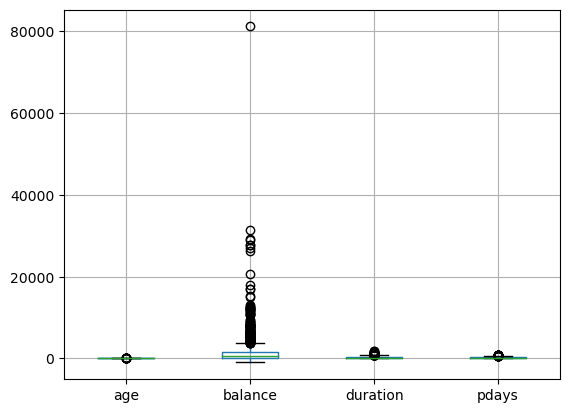

In [57]:
bank_df_one_hot.boxplot(column=to_rescale)
plt.show()

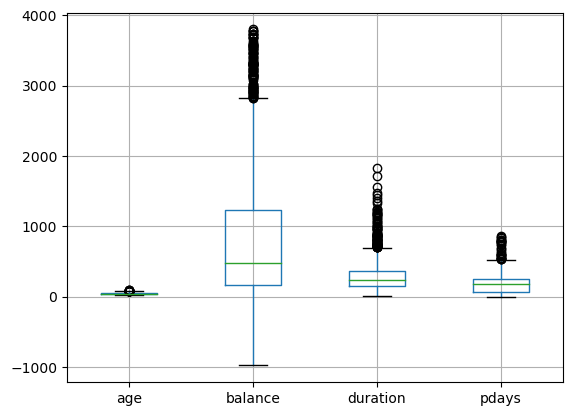

In [55]:
bank_df_outliers_removed.boxplot(column=to_rescale)
plt.show()

### Rescaling Features

In [58]:
robust_scaler = RobustScaler()

to_rescale = ["age", "balance", "duration", "pdays"]
bank_df_rescaled = pd.DataFrame()

bank_df_rescaled[to_rescale] = robust_scaler.fit_transform(bank_df_outliers_removed[to_rescale])
bank_df_rescaled.head(30)

,age,balance,duration,pdays
0,-0.352941,-0.085829,3.287982,-0.287293
1,0.058824,0.193351,0.004535,-0.276243
2,1.235294,0.520632,-0.480726,0.309392
3,0.529412,-0.080170,0.190476,0.303867
4,0.941176,0.491394,1.120181,0.685083
5,0.470588,0.417826,1.047619,-0.276243
6,-0.235294,1.359113,-0.321995,0.386740
7,0.411765,-0.082056,0.086168,0.806630
8,1.176471,-0.158453,-0.503401,-0.265193
9,0.000000,0.218816,3.260771,-0.281768


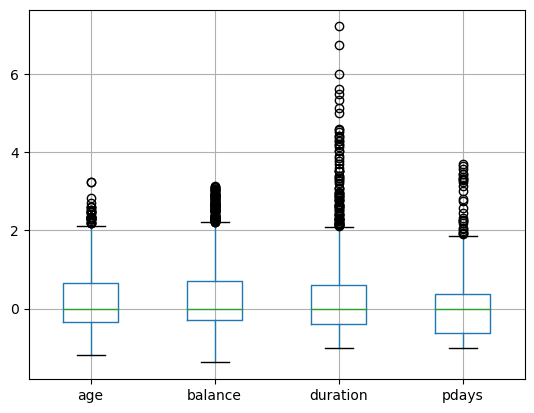

In [59]:
bank_df_rescaled.boxplot(column=to_rescale)
plt.show()

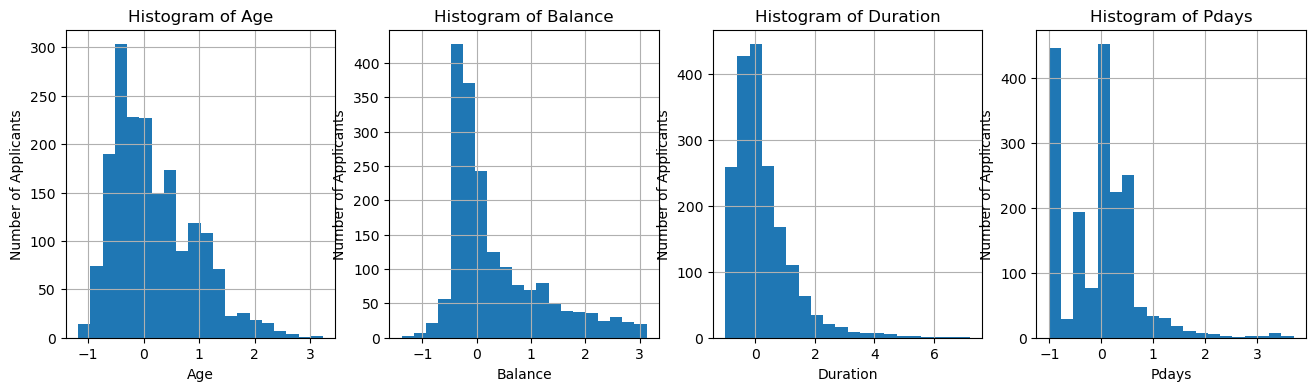

In [60]:
# Create figure with four subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,4))

# Plot age
axes[0].set_title("Histogram of Age")
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Number of Applicants')
bank_df_rescaled['age'].hist(bins=20, ax=axes[0])

# Plot balance
axes[1].set_title("Histogram of Balance")
axes[1].set_xlabel('Balance')
axes[1].set_ylabel('Number of Applicants')
bank_df_rescaled['balance'].hist(bins=20, ax=axes[1])

# Plot duration
axes[2].set_title("Histogram of Duration")
axes[2].set_xlabel('Duration')
axes[2].set_ylabel('Number of Applicants')
bank_df_rescaled['duration'].hist(bins=20, ax=axes[2])

# Plot pdays
axes[3].set_title("Histogram of Pdays")
axes[3].set_xlabel('Pdays')
axes[3].set_ylabel('Number of Applicants')
bank_df_rescaled['pdays'].hist(bins=20, ax=axes[3])

plt.show()

### Log Transform to deal with outliers

The above histograms are skewed to the left.

A log transform can help to normalise the data by compressing the range of the data and bringing the extreme values closer to the median. 

This can help to reduce the impact of outliers and make it easier to see patterns in the data.

In [61]:
bank_df_rescaled[to_rescale].min()

age        -1.176471
balance    -1.379863
duration   -1.020408
pdays      -1.016575
dtype: float64

In [62]:
# Use a log transformation to decrease the impact of outliers
bank_df_rescaled['age'] = np.log(bank_df_rescaled['age'] + 2.12)
bank_df_rescaled['balance'] = np.log(bank_df_rescaled['balance'] + 2.07)
bank_df_rescaled['duration'] = np.log(bank_df_rescaled['duration'] + 1.99)
bank_df_rescaled['pdays'] = np.log(bank_df_rescaled['pdays'] + 2.05)


<AxesSubplot: title={'center': 'Histogram of Pdays'}, xlabel='Pdays', ylabel='Number of Applicants'>

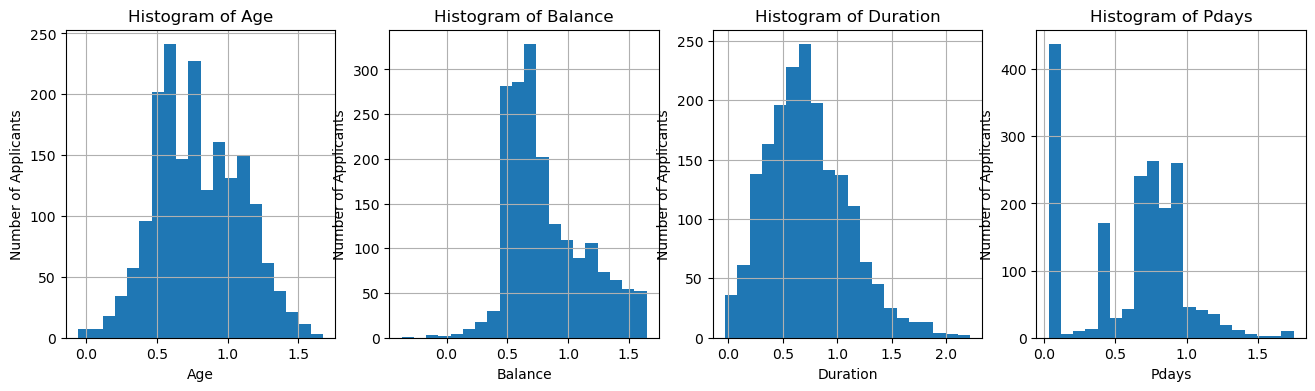

In [63]:
# Create figure with four subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,4))

# Plot age
axes[0].set_title("Histogram of Age")
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Number of Applicants')
bank_df_rescaled['age'].hist(bins=20, ax=axes[0])

# Plot balance
axes[1].set_title("Histogram of Balance")
axes[1].set_xlabel('Balance')
axes[1].set_ylabel('Number of Applicants')
bank_df_rescaled['balance'].hist(bins=20, ax=axes[1])

# Plot duration
axes[2].set_title("Histogram of Duration")
axes[2].set_xlabel('Duration')
axes[2].set_ylabel('Number of Applicants')
bank_df_rescaled['duration'].hist(bins=20, ax=axes[2])

# Plot pdays
axes[3].set_title("Histogram of Pdays")
axes[3].set_xlabel('Pdays')
axes[3].set_ylabel('Number of Applicants')
bank_df_rescaled['pdays'].hist(bins=20, ax=axes[3])

### Creating a new feature

I experimented with an age to balance ratio column. But I'm currently not sure if it creates any value.

I also created a new feature called housing and loan that has a value of 1 if the customer has both a housing loan and other loan.

In [64]:
# create a new column for the age balance ratio
bank_df_rescaled['age_to_balance_ratio'] = bank_df_rescaled['age'] / bank_df_rescaled['balance']

In [65]:
bank_df_rescaled.head(20)

,age,balance,duration,pdays,age_to_balance_ratio
0,0.569316,0.685201,1.663544,0.566851,0.830875
1,0.778785,0.816846,0.690411,0.573100,0.953405
2,1.210539,0.951902,0.411629,0.858404,1.271706
3,0.974338,0.688049,0.779543,0.856060,1.416087
4,1.118799,0.940551,1.134681,1.006162,1.189514
5,0.951885,0.911409,1.111074,0.573100,1.044410
6,0.633772,1.232302,0.511628,0.890661,0.514299
7,0.928917,0.687101,0.730524,1.049643,1.351936
8,1.192852,0.647913,0.396491,0.579310,1.841069
9,0.751416,0.828035,1.658375,0.569980,0.907469


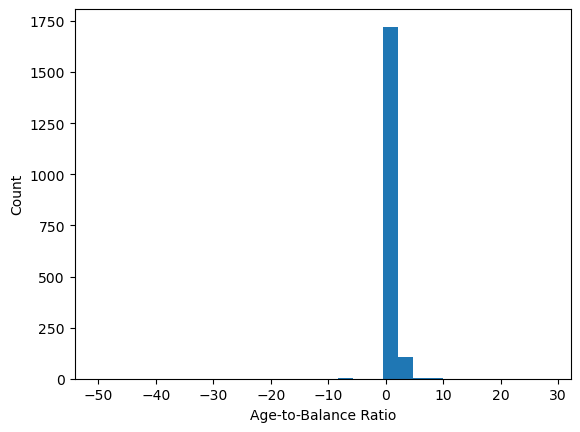

In [66]:
# Plot a histogram of the age-to-balance ratio column
plt.hist(bank_df_rescaled["age_to_balance_ratio"], bins=30)
plt.xlabel("Age-to-Balance Ratio")
plt.ylabel("Count")
plt.show()

In [67]:
# Create a new feature that is 1 when the person called has both a housing and regular loan.
bank_df_one_hot['housing_and_loan'] = ((bank_df_one_hot['housing_yes'] == 1) & (bank_df_one_hot['loan_yes'] == 1)).astype(int)
bank_df_one_hot[['housing_yes', 'loan_yes', 'housing_and_loan']].head(10)

,housing_yes,loan_yes,housing_and_loan
0,1,0,0
1,1,1,1
2,1,1,1
3,1,1,1
4,1,0,0
5,1,0,0
6,1,1,1
7,1,1,1
8,1,0,0
9,0,0,0


### Save to CSV

In [68]:
# Create a new dataframe named bank_df_to_csv that will contain the modified data.
bank_df_to_csv = bank_df_one_hot

# append the feature 'age_to_balance_ratio' to the to_rescale list.
features = to_rescale + ['age_to_balance_ratio']

# Assign the values of the 'to_rescale' features in the bank_df_rescaled dataframe to the corresponding features in the bank_df_to_csv dataframe.
bank_df_to_csv[to_rescale] = bank_df_rescaled[to_rescale]


In [69]:
bank_df_to_csv.to_csv("bank_data_prepared.csv")